In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.utils import get_custom_objects
from sklearn.model_selection import train_test_split

def mish(x):
    return x * tf.math.tanh(tf.math.softplus(x))

get_custom_objects().update({'mish': Activation(mish)})

# Activation functions to test
activation_functions = ['relu', 'swish', 'mish']
epochs_options = [10, 15, 20, 25, 30]  # Different epoch settings


In [4]:
english_words = ['word', 'the', 'of', 'and', 'to', 'a', 'in', 'for', 'is', 'on', 'that', 'by', 'this', 'with', 'i', 'you', 'it', 'not', 'or', 'be', 'are', 'from', 'at', 'as', 'your', 'all', 'have', 'new', 'more', 'an', 'was', 'we', 'will', 'home', 'can', 'us', 'about', 'if', 'page', 'my', 'has', 'search', 'free', 'but', 'our', 'one', 'other', 'do', 'no', 'information', 'time', 'they', 'site', 'he', 'up', 'may', 'what', 'which', 'their', 'news', 'out', 'use', 'any', 'there', 'see', 'only', 'so', 'his', 'when', 'contact', 'here', 'business', 'who', 'web', 'also', 'now', 'help', 'get', 'pm', 'view', 'online', 'c', 'e', 'first', 'am', 'been', 'would', 'how', 'were', 'me', 's', 'services', 'some', 'these', 'click', 'its', 'like', 'service', 'x', 'than', 'find', 'price', 'date', 'back', 'top', 'people', 'had', 'list', 'name', 'just', 'over', 'state', 'year', 'day', 'into', 'email', 'two', 'health', 'n', 'world', 're', 'next', 'used', 'go', 'b', 'work', 'last', 'most', 'products', 'music', 'buy', 'data', 'make', 'them', 'should', 'product', 'system', 'post', 'her', 'city', 't', 'add', 'policy', 'number', 'such', 'please', 'available', 'copyright', 'support', 'message', 'after', 'best', 'software', 'then', 'jan', 'good', 'video', 'well', 'd', 'where', 'info', 'rights', 'public', 'books', 'high', 'school', 'through', 'm', 'each', 'links', 'she', 'review', 'years', 'order', 'very', 'privacy', 'book', 'items', 'company', 'r', 'read', 'group', 'sex', 'need', 'many', 'user', 'said', 'de', 'does', 'set', 'under', 'general', 'research', 'university', 'january', 'mail', 'full', 'map', 'reviews', 'program', 'life', 'know', 'games', 'way', 'days', 'management', 'p', 'part', 'could', 'great', 'united', 'hotel', 'real', 'f', 'item', 'international', 'center', 'ebay', 'must', 'store', 'travel', 'comments', 'made', 'development', 'report', 'off', 'member', 'details', 'line', 'terms', 'before', 'hotels', 'did', 'send', 'right', 'type', 'because', 'local', 'those', 'using', 'results', 'office', 'education', 'national', 'car', 'design', 'take', 'posted', 'internet', 'address', 'community', 'within', 'states', 'area', 'want', 'phone', 'dvd', 'shipping', 'reserved', 'subject', 'between', 'forum', 'family', 'l', 'long', 'based', 'w', 'code', 'show', 'o', 'even', 'black', 'check', 'special', 'prices', 'website', 'index', 'being', 'women', 'much', 'sign', 'file', 'link', 'open', 'today', 'technology', 'south', 'case', 'project', 'same', 'pages', 'uk', 'version', 'section', 'own', 'found', 'sports', 'house', 'related', 'security', 'both', 'g', 'county', 'american', 'photo', 'game', 'members', 'power', 'while', 'care', 'network', 'down', 'computer', 'systems', 'three', 'total', 'place', 'end', 'following', 'download', 'h', 'him', 'without', 'per', 'access', 'think', 'north', 'resources', 'current', 'posts', 'big', 'media', 'law', 'control', 'water', 'history', 'pictures', 'size', 'art', 'personal', 'since', 'including', 'guide', 'shop', 'directory', 'board', 'location', 'change', 'white', 'text', 'small', 'rating', 'rate', 'government', 'children', 'during', 'usa', 'return', 'students', 'v', 'shopping', 'account', 'times', 'sites', 'level', 'digital', 'profile', 'previous', 'form', 'events', 'love', 'old', 'john', 'main', 'call', 'hours', 'image', 'department', 'title', 'description', 'non', 'k', 'y', 'insurance', 'another', 'why', 'shall', 'property', 'class', 'cd', 'still', 'money', 'quality', 'every', 'listing', 'content', 'country', 'private', 'little', 'visit', 'save', 'tools', 'low', 'reply', 'customer', 'december', 'compare', 'movies', 'include', 'college', 'value', 'article', 'york', 'man', 'card', 'jobs', 'provide', 'j', 'food', 'source', 'author', 'different', 'press', 'u', 'learn', 'sale', 'around', 'print', 'course', 'job', 'canada', 'process', 'teen', 'room', 'stock', 'training', 'too', 'credit', 'point', 'join', 'science', 'men', 'categories', 'advanced', 'west', 'sales', 'look', 'english', 'left', 'team', 'estate', 'box', 'conditions', 'select', 'windows', 'photos', 'gay', 'thread', 'week', 'category', 'note', 'live', 'large', 'gallery', 'table', 'register', 'however', 'june', 'october', 'november', 'market', 'library', 'really', 'action', 'start', 'series', 'model', 'features', 'air', 'industry', 'plan', 'human', 'provided', 'tv', 'yes', 'required', 'second', 'hot', 'accessories', 'cost', 'movie', 'forums', 'march', 'la', 'september', 'better', 'say', 'questions', 'july', 'yahoo', 'going', 'medical', 'test', 'friend', 'come', 'dec', 'server', 'pc', 'study', 'application', 'cart', 'staff', 'articles', 'san', 'feedback', 'again', 'play', 'looking', 'issues', 'april', 'never', 'users', 'complete', 'street', 'topic', 'comment', 'financial', 'things', 'working', 'against', 'standard', 'tax', 'person', 'below', 'mobile', 'less', 'got', 'blog', 'party', 'payment', 'equipment', 'login', 'student', 'let', 'programs', 'offers', 'legal', 'above', 'recent', 'park', 'stores', 'side', 'act', 'problem', 'red', 'give', 'memory', 'performance', 'social', 'q', 'august', 'quote', 'language', 'story', 'sell', 'options', 'experience', 'rates', 'create', 'key', 'body', 'young', 'america', 'important', 'field', 'few', 'east', 'paper', 'single', 'ii', 'age', 'activities', 'club', 'example', 'girls', 'additional', 'password', 'z', 'latest', 'something', 'road', 'gift', 'question', 'changes', 'night', 'ca', 'hard', 'texas', 'oct', 'pay', 'four', 'poker', 'status', 'browse', 'issue', 'range', 'building', 'seller', 'court', 'february', 'always', 'result', 'audio', 'light', 'write', 'war', 'nov', 'offer', 'blue', 'groups', 'al', 'easy', 'given', 'files', 'event', 'release', 'analysis', 'request', 'fax', 'china', 'making', 'picture', 'needs', 'possible', 'might', 'professional', 'yet', 'month', 'major', 'star', 'areas', 'future', 'space', 'committee', 'hand', 'sun', 'cards', 'problems', 'london', 'washington', 'meeting', 'rss', 'become', 'interest', 'id', 'child', 'keep', 'enter', 'california', 'porn', 'share', 'similar', 'garden', 'schools', 'million', 'added', 'reference', 'companies', 'listed', 'baby', 'learning', 'energy', 'run', 'delivery', 'net', 'popular', 'term', 'film', 'stories', 'put', 'computers', 'journal', 'reports', 'co', 'try', 'welcome', 'central', 'images', 'president', 'notice', 'god', 'original', 'head', 'radio', 'until', 'cell', 'color', 'self', 'council', 'away', 'includes', 'track', 'australia', 'discussion', 'archive', 'once', 'others', 'entertainment', 'agreement', 'format', 'least', 'society', 'months', 'log', 'safety', 'friends', 'sure', 'faq', 'trade', 'edition', 'cars', 'messages', 'marketing', 'tell', 'further', 'updated', 'association', 'able', 'having', 'provides', 'david', 'fun', 'already', 'green', 'studies', 'close', 'common', 'drive', 'specific', 'several', 'gold', 'feb', 'living', 'sep', 'collection', 'called', 'short', 'arts', 'lot', 'ask', 'display', 'limited', 'powered', 'solutions', 'means', 'director', 'daily', 'beach', 'past', 'natural', 'whether', 'due', 'et', 'electronics', 'five', 'upon', 'period', 'planning', 'database', 'says', 'official', 'weather', 'mar', 'land', 'average', 'done', 'technical', 'window', 'france', 'pro', 'region', 'island', 'record', 'direct', 'microsoft', 'conference', 'environment', 'records', 'st', 'district', 'calendar', 'costs', 'style', 'url', 'front', 'statement', 'update', 'parts', 'aug', 'ever', 'downloads', 'early', 'miles', 'sound', 'resource', 'present', 'applications', 'either', 'ago', 'document', 'works', 'material', 'bill', 'apr', 'written', 'talk', 'federal', 'hosting', 'rules', 'final', 'adult', 'tickets', 'thing', 'centre', 'requirements', 'via', 'cheap', 'nude', 'kids', 'finance', 'TRUE', 'minutes', 'else', 'mark', 'third', 'rock', 'gifts', 'europe', 'reading', 'topics', 'bad', 'individual', 'tips', 'plus', 'auto', 'cover', 'usually', 'edit', 'together', 'videos', 'percent', 'fast', 'function', 'fact', 'unit', 'getting', 'global', 'tech', 'meet', 'far', 'economic', 'en', 'player', 'projects', 'lyrics', 'often', 'subscribe', 'submit', 'germany', 'amount', 'watch', 'included', 'feel', 'though', 'bank', 'risk', 'thanks', 'everything', 'deals', 'various', 'words', 'linux', 'jul', 'production', 'commercial', 'james', 'weight', 'town', 'heart', 'advertising', 'received', 'choose', 'treatment', 'newsletter', 'archives', 'points', 'knowledge', 'magazine', 'error', 'camera', 'jun', 'girl', 'currently', 'construction', 'toys', 'registered', 'clear', 'golf', 'receive', 'domain', 'methods', 'chapter', 'makes', 'protection', 'policies', 'loan', 'wide', 'beauty', 'manager', 'india', 'position', 'taken', 'sort', 'listings', 'models', 'michael', 'known', 'half', 'cases', 'step', 'engineering', 'florida', 'simple', 'quick', 'none', 'wireless', 'license', 'paul', 'friday', 'lake', 'whole', 'annual', 'published', 'later', 'basic', 'sony', 'shows', 'corporate', 'google', 'church', 'method', 'purchase', 'customers', 'active', 'response', 'practice', 'hardware', 'figure', 'materials', 'fire', 'holiday', 'chat', 'enough', 'designed', 'along', 'among', 'death', 'writing', 'speed', 'html', 'countries', 'loss', 'face', 'brand', 'discount', 'higher', 'effects', 'created', 'remember', 'standards', 'oil', 'bit', 'yellow', 'political', 'increase', 'advertise', 'kingdom', 'base', 'near', 'environmental', 'thought', 'stuff', 'french', 'storage', 'oh', 'japan', 'doing', 'loans', 'shoes', 'entry', 'sight']

nigerian_words = ['dị ka', 'm', 'ya', 'na', 'enye', 'bụ', 'n’ihi na', 'ụfọdụ', 'ma ọ bụrụ na', 'ọrụ', 'ha', 'ịbụ', 'na', 'otu', 'nwere', 'a', 'si', 'site', 'na-ekpo ọkụ', 'okwu', 'ma', 'ihe', 'ụfọdụ', 'bụ', 'ya', 'ị', 'ma ọ bụ', 'nwere', 'na', 'nke', 'na-', 'na', 'a', 'na', 'anyị', 'ike', 'si', 'ọzọ', 'ndị', 'nke', 'eme', 'ha', 'oge', 'ma ọ bụrụ na', 'ekpe', 'otú', 'kwuru', 'ihe', 'ọ bụla', 'ịgwa', 'ke', 'set', 'atọ', 'chọrọ', 'ikuku', 'ọma', 'na-', 'igwu egwu', 'obere', 'njedebe', 'tinye', 'n’ụlọ', 'na-agụ', 'aka', 'ọdụ ụgbọ mmiri', 'nnukwu', 'asụpe', 'tinye', 'ọbụna', 'ala', 'ebe a', 'ana', 'nnukwu', 'elu', 'dị', 'na-eso', 'eme', 'ya mere', 'ịjụ', 'ndị ikom', 'mgbanwe', 'wee', 'ìhè', 'ụdị', 'anya', 'mkpa', 'ụlọ', 'foto', 'na-agbalị', 'anyị', 'ọzọ', 'anụmanụ', 'ebe', 'nne', 'ụwa', 'nso', 'ewu', 'onwe', 'ụwa', 'nna', 'ọ bụla', 'ọhụrụ', 'ọrụ', 'akụkụ', 'nara', 'nweta', 'ebe', 'mere', 'ndụ', 'ebe', 'mgbe', 'azụ', 'obere', 'naanị', 'gburugburu', 'nwoke', 'afọ', 'wee', 'izi', 'ọ bụla', 'mma', 'm', 'nye', 'anyị', 'n’okpuru', 'aha', 'nnọọ', 'site na', 'dị nnọọ', 'ụdị', 'ikpe', 'akwa', 'chere', 'na-ekwu', 'aka', 'ala', 'akara', 'iche', 'N’aka', 'kpatara', 'ukwuu', 'pụtara', 'n’ihu', 'nkwaghari', 'nri', 'nwa', 'ochie', 'oke', 'otu', 'ọ', 'niile', 'n’ebe ahụ', 'mgbe', 'elu', 'iji', 'gị', 'ụzọ', 'banyere', 'ọtụtụ', 'mgbe ahụ', 'ha', 'dee', 'ga-', 'dị ka', 'otú', 'ndị a', 'ya', 'ogologo', 'eme ka', 'ihe', 'ịhụ', 'ya', 'abụọ', 'nwere', 'anya', 'ọzọ', 'ụbọchị', 'ike', 'aga', 'bịa', 'mere', 'ọnụ ọgụgụ', 'ada', 'mba', 'kacha', 'ndị mmadụ', 'm', 'n’elu', 'mara', 'mmiri', 'karịa', 'oku', 'mbụ', 'onye', 'ike', 'ala', 'n’akụkụ', 'kemgbe', 'ugbu a', 'ịchọta', 'isi', 'eguzo', 'aka', 'peeji nke', 'kwesịrị', 'obodo', 'hụrụ', 'azịza', 'ụlọ akwụkwọ', 'na-eto', 'ọmụmụ', 'ka', 'ịmụta', 'osisi', 'mkpuchi', 'nri', 'anyanwụ', 'anọ', 'n’etiti', 'ala', 'na-', 'anya', 'mgbe', 'ikpeazụ', 'ka', 'chere', 'obodo', 'osisi', 'ịgafe', 'ugbo', 'ike', 'mmalite', 'ike', 'akụkọ', 'ikwo', 'anya', 'osimiri', 'ise', 'ekpe', 'oge', 'omume', 'emela', 'ebe', 'akuko', 'nso', 'abalị', 'n’ezie', 'ndụ', 'ole na ole', 'ugwu', 'akwụkwọ', 'ebu', 'were', 'sayensị', 'eri', 'ụlọ', 'enyi', 'malitere', 'echiche', 'azụ', 'ugwu', 'kwụsị', 'ozugbo', 'isi', 'hear', 'ịnyịnya', 'ịkpụ', 'hụ', 'na-ekiri', 'agba', 'ihu', 'osisi', 'isi', 'oghe', 'iyi', 'ọnụ', 'ọzọ', 'ọcha', 'ụmụ', 'na-amalite', 'wee', 'na-eje ije', 'atụ', 'mfe', 'akwụkwọ', 'otu', 'mgbe nile', 'music', 'ndị', 'ma', 'akara', 'mgbe', 'ozi', 'ruo mgbe', 'mile', 'osimiri', 'ụgbọ ala', 'ụkwụ', 'nlekọta', 'nke abụọ', 'ezuru', 'larịị', 'nwa agbọghọ', 'na-adị', 'nwa', 'njikere', 'n’elu', 'mgbe', 'acha ọbara ọbara', 'ndepụta', 'ezie', 'na-eche', 'okwu', 'nnụnụ', 'anya', 'ozu', 'nkịta', 'ezinụlọ', 'kpọmkwem', 'abụrụ', 'ahapụ', 'song', 'ịlele', 'ụzọ', 'ngwaahịa', 'ojii', 'obere', 'onuogugu', 'otu', 'ifufe', 'ajụjụ', 'eme', 'zuru oke', 'bi', 'Mo ti', 'rẹ', 'ti', 'o si', 'je', 'fun', 'lori', 'ni o wa', 'pẹlu', 'ti won', 'ki o wa ni', 'ni', 'ọkan', 'ni', 'yi', 'lati', 'nipa', 'gbona', 'ọrọ', 'ṣugbọn', 'kini', 'diẹ ninu awọn', 'ni', 'o', 'ti o', 'tabi', 'ní', 'awọn', 'ti awọn', 'to', 'ati ki o', 'kan', 'ni', 'a', 'le', 'jade', 'miiran', 'wọn', 'eyi ti', 'ṣe', 'wọn', 'akoko', 'ti o ba ti', 'yoo', 'Bawo', 'wi', 'ohun', 'kọọkan', 'sọ fun', 'wo ni', 'ṣeto', 'mẹta', 'fẹ', 'air', 'daradara', 'tun', 'mu ṣiṣẹ', 'kekere', 'opin', 'fi', 'ile', 'ka', 'ọwọ', 'ibudo', 'tobi', 'sipeli', 'fi', 'ani', 'ilẹ', 'nibi', 'gbọdọ', 'nla', 'ga', 'iru', 'tẹle', 'igbese', 'idi', 'beere', 'awọn ọkunrin', 'ayipada', 'si lọ', 'ina', 'Iru', 'pa', 'nilo', 'ile', 'aworan', 'gbiyanju', 'wa', 'lẹẹkansi', 'eranko', 'ojuami', 'iya', 'aye', 'sunmọ', 'kọ', 'ara', 'aiye', 'baba', 'eyikeyi', 'titun', 'iṣẹ', 'apakan', 'ya', 'gba', 'ibi', 'ṣe', 'gbe', 'ibi ti', 'lẹhin', 'pada', 'kekere', 'nikan', 'yika', 'eniyan', 'odun', 'wá', 'hàn', 'gbogbo', 'ti o dara', 'mi', 'fun', 'wa', 'labẹ', 'orukọ', 'gan', 'nipasẹ', 'o kan', 'fọọmu', 'gbolohun', 'nla', 'ro', 'sọ', 'Egba Mi O', 'kekere', 'ila', 'yato', 'Tan', 'fa', 'Elo', 'túmọ', 'ki o to', 'Gbe', 'ọtun', 'ọmọkunrin', 'ti atijọ', 'ju', 'kanna', 'o', 'gbogbo', 'nibẹ', 'Nigbawo', 'soke', 'lilo', 'rẹ', 'ọna', 'nipa', 'ọpọlọpọ', 'ki o si', 'wọn', 'kọ', 'ṣe', 'bi', 'ki', 'wọnyi', 'rẹ', 'gun', 'ṣe', 'ohun', 'wo', 'u', 'meji', 'ni o ni', 'wo', 'diẹ', 'ọjọ', 'le', 'lọ', 'wa', 'ṣe', 'nọmba', 'dun', 'ko si', 'julọ', 'eniyan', 'mi', 'lori', 'mọ', 'omi', 'ju', 'ipe', 'akọkọ', 'ti o', 'le', 'si isalẹ', 'ẹgbẹ', 'ti', 'bayi', 'ri', 'ori', 'duro', 'ti ara', 'iwe', 'yoo', 'orilẹ-ede', 'ri', 'idahun', 'ile-iwe', 'dagba', 'iwadi', 'si tun', 'ko', 'ohun ọgbìn', 'ideri', 'ounje', 'oorun', 'mẹrin', 'laarin', 'ipinle', 'pa', 'oju', 'ko', 'kẹhin', 'jẹ ki', 'ro', 'ilu', 'igi', 'kọjá', 'r’oko', 'lile', 'ibere', 'ki', 'itan', 'ri', 'jina', 'okun', 'fa', 'osi', 'pẹ', 'sure', 'se ko', 'nigba ti', 'tẹ', 'sunmọ', 'alẹ', 'gidi', 'aye', 'diẹ', 'ariwa', 'iwe', 'gbe', 'si mu', 'Imọ', 'jẹ', 'yara', 'ọrẹ', 'bẹrẹ', 'agutan', 'eja', 'oke', 'duro', 'lẹẹkan', 'mimọ', 'gbọ', 'ẹṣin', 'ge', 'daju', 'wo', 'awọ', 'oju', 'igi', 'akọkọ', 'ìmọ', 'dabi', 'papo', 'Itele', 'funfun', 'ọmọ', 'bẹrẹ', 'ni', 'rin', 'apẹẹrẹ', 'irorun', 'iwe', 'ẹgbẹ', 'nigbagbogbo', 'orin ti', 'awon ti', 'mejeeji', 'aami', 'igba', 'lẹta', 'titi', 'maili', 'odo', 'ayọkẹlẹ', 'ẹsẹ', 'itọju', 'keji', 'to', 'itele ti', 'omobirin', 'ibùgbé', 'odo', 'setan', 'loke', 'lailai', 'pupa', 'akojọ', 'tilẹ', 'lero', 'Ọrọ', 'eye', 'laipe', 'ara', 'aja', 'ebi', 'taara', 'duro', 'fi', 'song', 'wọn', 'ilekun', 'ọja', 'dudu', 'kukuru', 'numeral', 'kilasi', 'afẹfẹ', 'ibeere', 'ṣẹlẹ', 'pari', 'omi', 'agbegbe', 'kamar yadda', 'Ina', 'da', 'cewa,', 'ya', 'shi ne', 'domin', 'a kan', 'suna', 'tare da', 'suna', 'zama', 'a', 'daya', 'da', 'wannan', 'daga', 'by', 'zafi', 'kalma', 'amma', 'abin da', 'wasu', 'ne', 'shi', 'ka', 'ko', 'da', 'da', 'daga', 'to', 'da kuma', 'wani', 'a', 'muna', 'iya', 'out', 'sauran', 'suna', 'wanda', 'yi', 'da', 'lokaci', 'idan', 'so', 'yadda', 'ya ce', 'wani', 'kowace', 'gaya', 'ya aikata', 'sa', 'uku', 'so', 'air', 'da kyau', 'har ila yau,', 'wasa', 'small', 'karshen', 'sa', 'gida', 'karanta', 'hannu', 'tashar jiragen ruwa', 'babban', 'rubutawa', 'add', 'ko da', 'ƙasar', 'nan', 'tilas', 'big', 'high', 'irin', 'bin', 'yi', 'dalilin da ya sa', 'tambaye', 'mutane', 'canji', 'tafi', 'haske', 'irin', 'kashe', 'bukata', 'house', 'hoto', 'kokarin', 'mu', 'kuma', 'animal', 'aya', 'uwar', 'duniya', 'kusa da', 'gina', 'kai', 'duniya', 'uba', 'wani', 'new', 'aiki', 'part', 'kai', 'samu', 'wuri', 'ya yi', 'rayuwa', 'inda', 'bayan', 'baya', 'kadan', 'kawai', 'zagaye', 'mutum', 'shekara', 'ya zo', 'show', 'kowane', 'mai kyau', 'ni', 'ba', 'mu', 'karkashin', 'sunan', 'sosai', 'ta hanyar', 'kawai', 'form', 'magana', 'mai girma', 'tunani', 'ka ce', 'taimaka', 'low', 'line', 'bambanta', 'nuna', 'sabili', 'da yawa', 'nufi', 'kafin', 'tafi', 'dama', 'yaro', 'da haihuwa', 'ma', 'haka', 'sai ta', 'duk', 'akwai', 'a lokacin da', 'up', 'amfani', 'your', 'hanyar', 'game da', 'da yawa', 'to,', 'da su', 'rubuta', 'zai', 'kamar', 'don haka', 'wadannan', 'ta', 'yaushe', 'sa', 'abu', 'gani', 'shi', 'biyu', 'yana da', 'duba', 'more', 'rana', 'iya', 'je', 'zo', 'ya yi', 'lambar', 'sauti', 'babu', 'mafi', 'mutane', 'my', 'a kan', 'sani', 'ruwa', 'fiye da', 'kira', 'na farko', 'wanda', 'may', 'down', 'gefe', 'kasance', 'yanzu', 'samu', 'kai', 'tsaya', 'own', 'page', 'kammata', 'country', 'samu', 'amsar', 'makaranta', 'girma', 'study', 'har yanzu', 'koyi', 'shuka', 'cover', 'abinci', 'rãnã', 'hudu', 'tsakanin', 'jihar', 'ci gaba', 'ido', 'taba', 'na karshe', 'bari', 'tsammani', 'city', 'itacen', 'kuros', 'farm', 'wuya', 'farko', 'cikakken mulki', 'story', 'saw', 'far', 'tẽku', 'zana', 'bar', 'marigayi', 'ran', 'kar ka', 'yayin da', 'latsa', 'close', 'dare', 'real', 'rayuwa', '’yan', 'north', 'littafi', 'kawo', 'ya ɗauki', 'kimiyya', 'ku ci', 'dakin', 'aboki', 'ya fara', 'ra’ayin', 'kifi', 'dutse', 'daina', 'sau ɗaya', 'tushe', 'ji', 'doki', 'yanke', 'tabbata', 'watch', 'launi', 'face', 'wood', 'main', 'open', 'ze', 'tare', 'na gaba', 'white', 'yara', 'za a fara', 'samu', 'tafiya', 'misali', '’yanci', 'takarda', 'tara', 'ko da yaushe', 'music', 'wadanda', 'duka', 'mark', 'sau da yawa', 'wasika', 'har sai', 'mile', 'kogin', 'car', 'feet', 'kula', 'na biyu', 'isa', 'sarari', 'girl', 'saba', 'matasa', 'shirye', 'a sama', 'taba', 'ja', 'list', 'ko da yake', 'ji', 'talk', 'tsuntsu', 'da ewa ba', 'jiki', 'kare', 'iyali', 'kai tsaye', 'matsayi', 'bar', 'song', 'auna', 'kofa', 'samfur', 'black', 'short', 'adadi', 'class', 'iska', 'tambaya', 'faru', 'agbegbe']

In [5]:
# Combine and create labels
words = english_words + nigerian_words
labels = [0] * len(english_words) + [1] * len(nigerian_words)



# English words = 0
# Nigerian words = 1

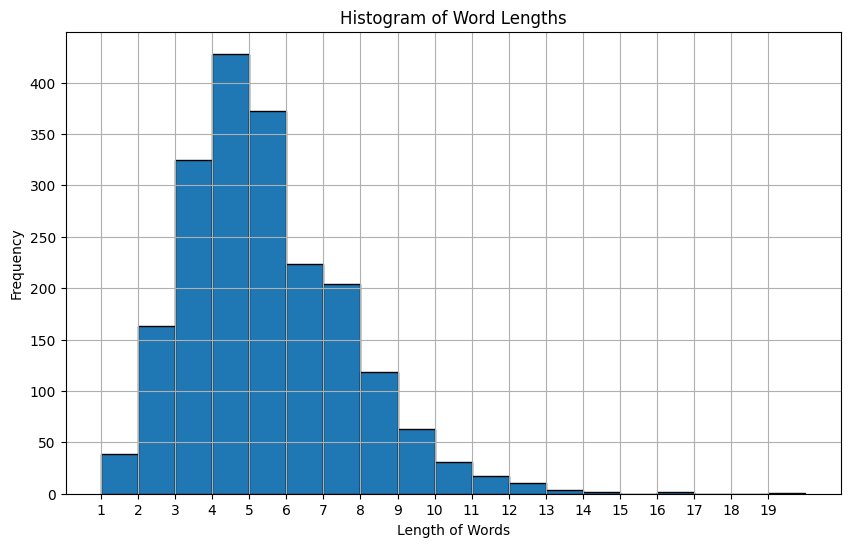

In [6]:
word_lengths = [len(word) for word in words]

plt.figure(figsize=(10, 6))
plt.hist(word_lengths, bins=range(min(word_lengths), max(word_lengths) + 2), edgecolor='black')
plt.title('Histogram of Word Lengths')
plt.xlabel('Length of Words')
plt.ylabel('Frequency')
plt.xticks(range(min(word_lengths), max(word_lengths) + 1))  # Set x-ticks to show every word length
plt.grid(True)
plt.show()

In [7]:
long_words = [word for word in set(words) if len(word) == 19]

print(long_words) 

['tashar jiragen ruwa']


In [8]:
print(labels[:10])
print(labels[-10:])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [9]:
alphabet = 'abcdefghijklmnopqrstuvwxyz'
char_to_index = {char: idx for idx, char in enumerate(alphabet)}

def encode_text(text):
    # Create a zero vector of length equal to the number of characters in the alphabet
    vector = np.zeros(len(alphabet))
    for char in text.lower():  # Convert text to lowercase to ensure consistency
        if char in char_to_index:
            vector[char_to_index[char]] += 1  # Increment to count the occurrences
    return vector


data = [encode_text(word) for word in words]
print(char_to_index)
# data

{'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6, 'h': 7, 'i': 8, 'j': 9, 'k': 10, 'l': 11, 'm': 12, 'n': 13, 'o': 14, 'p': 15, 'q': 16, 'r': 17, 's': 18, 't': 19, 'u': 20, 'v': 21, 'w': 22, 'x': 23, 'y': 24, 'z': 25}


In [10]:
data = np.array(data)
labels = np.array(labels)

print(data[99])
print(data[72])
print(data[543])
print(data[1345])

print(type(data), data.shape)
print(type(labels), labels.shape)

[1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 2. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0.]
<class 'numpy.ndarray'> (2002, 26)
<class 'numpy.ndarray'> (2002,)


In [11]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)


Training data shape: (1601, 26)
Test data shape: (401, 26)


In [20]:
results = {}

for activation in activation_functions:
    for epochs in epochs_options:
        # Define the model
        model = Sequential([
            Dense(32, input_dim=26, activation=activation),
            Dense(64, activation=activation),
            Dense(32, activation=activation),
            Dense(8, activation=activation),
            Dense(1, activation='sigmoid')
        ])
        
        # Compile the model
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        
        # Train the model
        print(f"Training with {activation} activation for {epochs} epochs...")
        history = model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_data=(X_test, y_test), verbose=0)
        
        # Store results
        results[(activation, epochs)] = history


c:\Users\samuel.nwabuike\AppData\Local\miniconda3\envs\creditenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training with relu activation for 10 epochs...
Training with relu activation for 15 epochs...
Training with relu activation for 20 epochs...
Training with relu activation for 25 epochs...
Training with relu activation for 30 epochs...
Training with swish activation for 10 epochs...
Training with swish activation for 15 epochs...
Training with swish activation for 20 epochs...
Training with swish activation for 25 epochs...
Training with swish activation for 30 epochs...
Training with mish activation for 10 epochs...
Training with mish activation for 15 epochs...
Training with mish activation for 20 epochs...
Training with mish activation for 25 epochs...
Training with mish activation for 30 epochs...


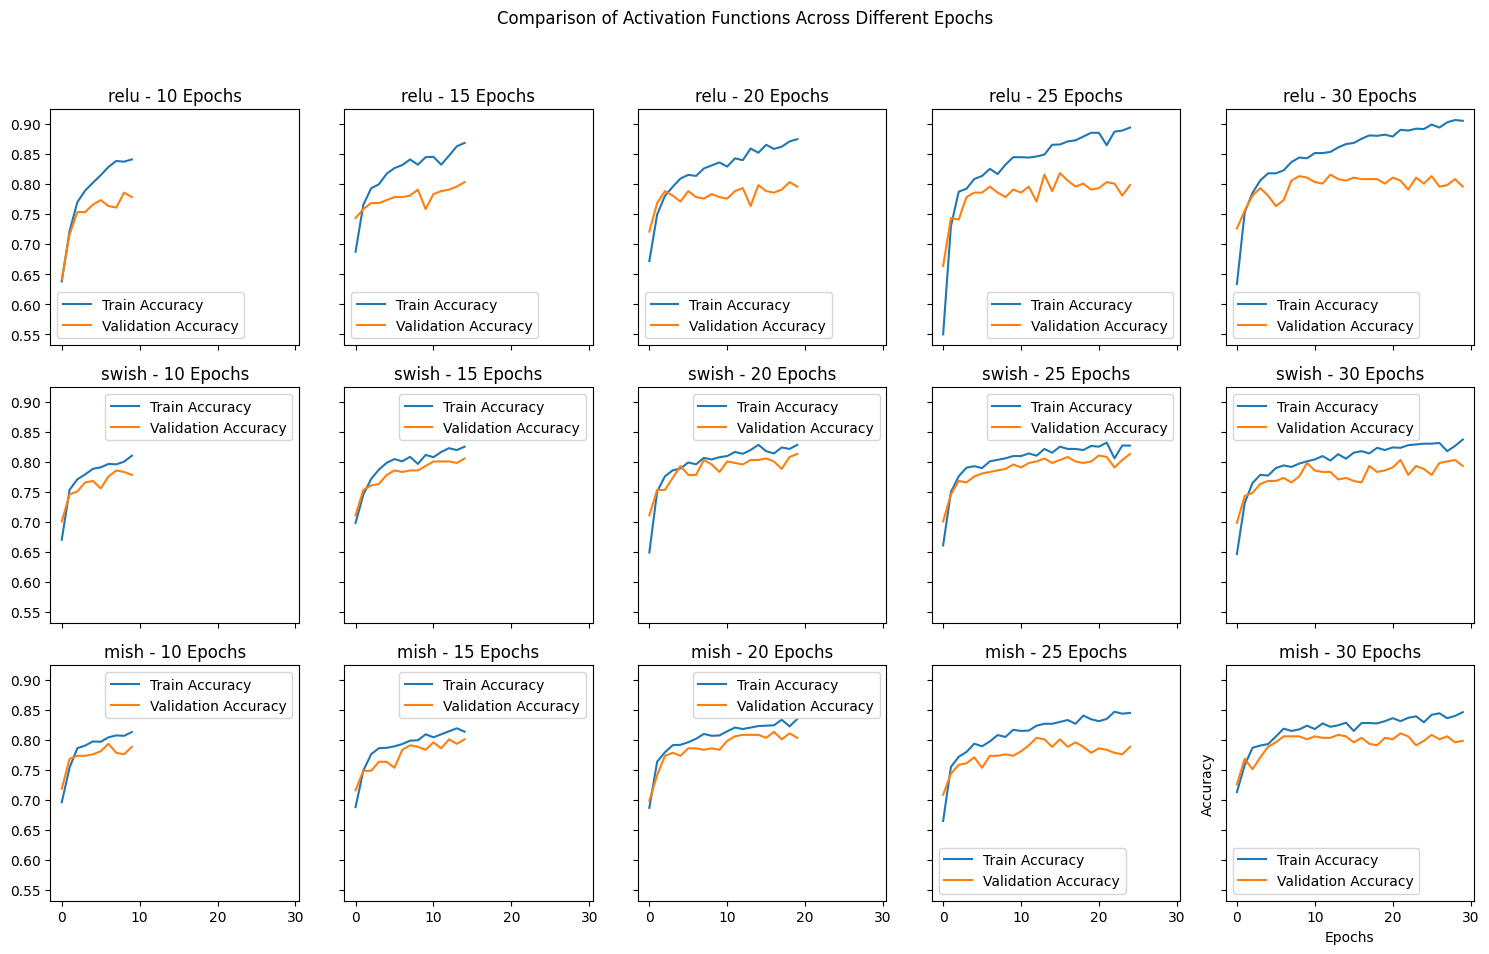

In [16]:
fig, ax = plt.subplots(len(activation_functions), len(epochs_options), figsize=(15, 10), sharex=True, sharey=True)

for i, activation in enumerate(activation_functions):
    for j, epochs in enumerate(epochs_options):
        hist = results[(activation, epochs)]
        ax[i, j].plot(hist.history['accuracy'], label='Train Accuracy')
        ax[i, j].plot(hist.history['val_accuracy'], label='Validation Accuracy')
        ax[i, j].set_title(f'{activation} - {epochs} Epochs')
        ax[i, j].legend()

plt.suptitle('Comparison of Activation Functions Across Different Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


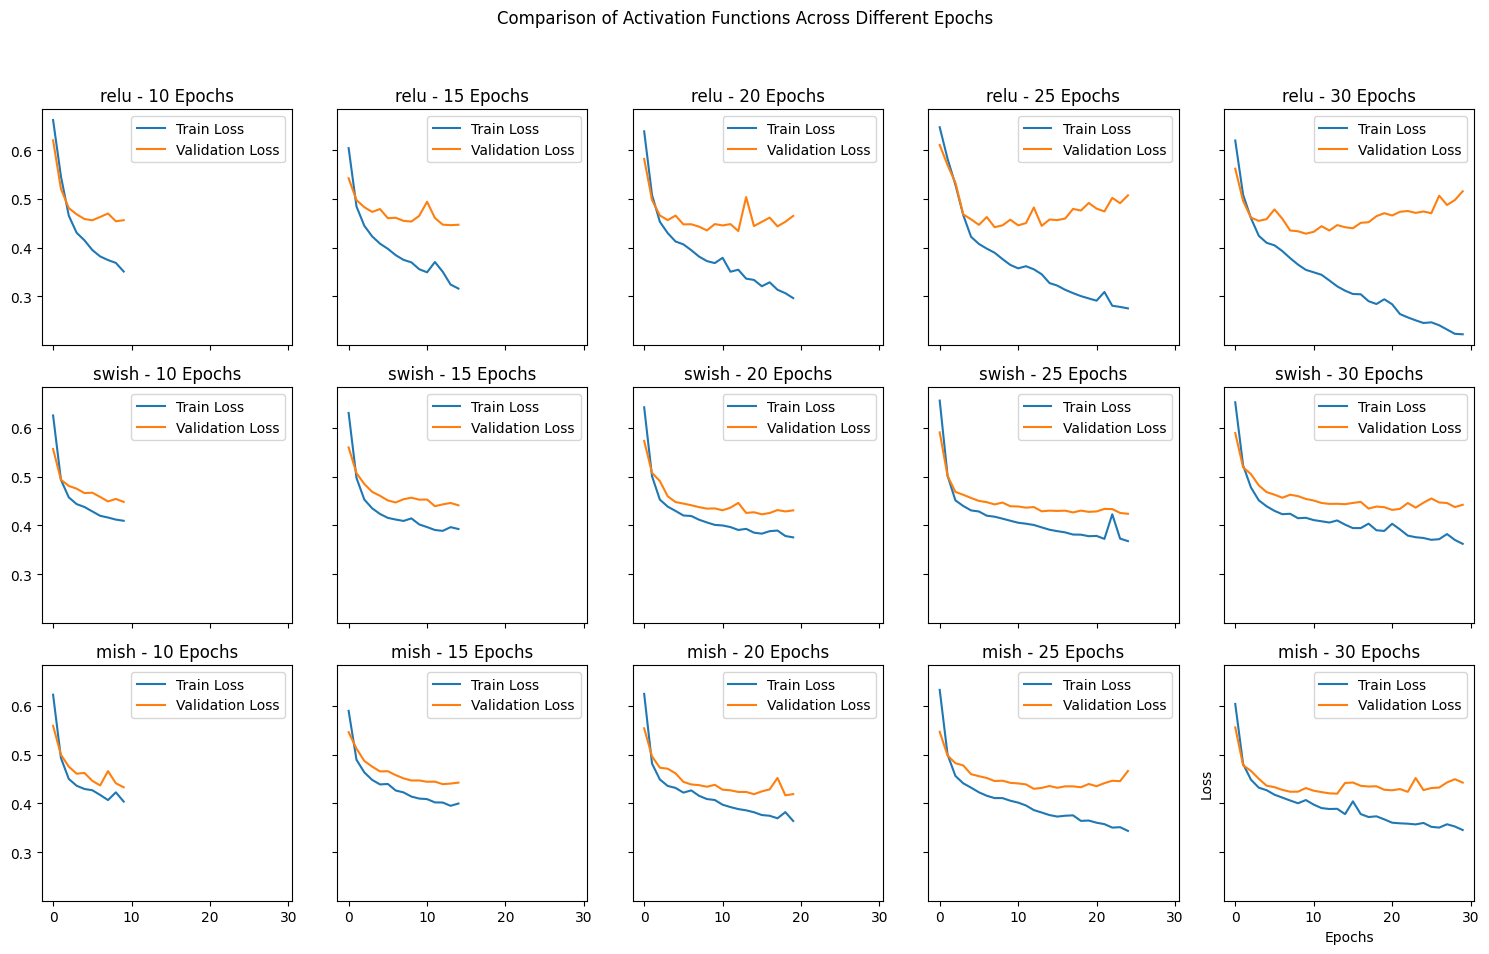

In [17]:
fig, ax = plt.subplots(len(activation_functions), len(epochs_options), figsize=(15, 10), sharex=True, sharey=True)

for i, activation in enumerate(activation_functions):
    for j, epochs in enumerate(epochs_options):
        hist = results[(activation, epochs)]
        ax[i, j].plot(hist.history['loss'], label='Train Loss')
        ax[i, j].plot(hist.history['val_loss'], label='Validation Loss')
        ax[i, j].set_title(f'{activation} - {epochs} Epochs')
        ax[i, j].legend()

plt.suptitle('Comparison of Activation Functions Across Different Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [19]:
test_words = ['plaintiff', 'naija', 'cue', 'bẹẹni', 'harvest', 'oyibo', 'Sunana']
# test_words = ['sample', 'test', 'nigeria', 'lagos']
test_data = np.array([encode_text(word) for word in test_words])
true_labels = [0, 0, 0, 1, 0, 1, 1]
np.set_printoptions(precision=6, suppress=True)

for activation in activation_functions:
    for epochs in epochs_options:
        predictions = model.predict(test_data)
        predicted_classes = (predictions > 0.5).astype(int)
        accuracy = np.mean(predicted_classes.flatten() == true_labels)
        print(f"Model with {activation if isinstance(activation, str) else activation.__name__} activation and {epochs} epochs:")
        print("Predictions:", predictions.flatten())
        print("Predicted Classes:", predicted_classes.flatten())
        print(f"Accuracy on new data: {accuracy:.4f}\n")
        

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Model with relu activation and 10 epochs:
Predictions: [0.001818 0.972944 0.461469 0.851947 0.000303 0.836792 0.935577]
Predicted Classes: [0 1 0 1 0 1 1]
Accuracy on new data: 0.8571

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Model with relu activation and 15 epochs:
Predictions: [0.001818 0.972944 0.461469 0.851947 0.000303 0.836792 0.935577]
Predicted Classes: [0 1 0 1 0 1 1]
Accuracy on new data: 0.8571

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Model with relu activation and 20 epochs:
Predictions: [0.001818 0.972944 0.461469 0.851947 0.000303 0.836792 0.935577]
Predicted Classes: [0 1 0 1 0 1 1]
Accuracy on new data: 0.8571

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Model with relu activation and 25 epochs:
Predictions: [0.001818 0.972944 0.461469 0.851947 0.000303 0.836792 0.935577]
Predicted Classes: [0 1 0 1 0 1 1]
Accuracy on new data: 0.8571

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Model with relu activation and 30 epochs:
Predictions: [0.001818 0.972

In [25]:
for activation in activation_functions:
    for epochs in epochs_options:
        model.summary()

Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_150 (Dense)               │ (None, 32)             │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_151 (Dense)               │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_152 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_153 (Dense)               │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_154 (Dense)               │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,989 (62.46 KB)

 Trainable params: 5,329 (20.82 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 10,660 (41.64 KB)

Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_150 (Dense)               │ (None, 32)             │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_151 (Dense)               │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_152 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_153 (Dense)               │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_154 (Dense)               │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,989 (62.46 KB)

 Trainable params: 5,329 (20.82 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 10,660 (41.64 KB)

Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_150 (Dense)               │ (None, 32)             │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_151 (Dense)               │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_152 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_153 (Dense)               │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_154 (Dense)               │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,989 (62.46 KB)

 Trainable params: 5,329 (20.82 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 10,660 (41.64 KB)

Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_150 (Dense)               │ (None, 32)             │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_151 (Dense)               │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_152 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_153 (Dense)               │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_154 (Dense)               │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,989 (62.46 KB)

 Trainable params: 5,329 (20.82 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 10,660 (41.64 KB)

Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_150 (Dense)               │ (None, 32)             │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_151 (Dense)               │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_152 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_153 (Dense)               │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_154 (Dense)               │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,989 (62.46 KB)

 Trainable params: 5,329 (20.82 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 10,660 (41.64 KB)

Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_150 (Dense)               │ (None, 32)             │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_151 (Dense)               │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_152 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_153 (Dense)               │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_154 (Dense)               │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,989 (62.46 KB)

 Trainable params: 5,329 (20.82 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 10,660 (41.64 KB)

Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_150 (Dense)               │ (None, 32)             │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_151 (Dense)               │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_152 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_153 (Dense)               │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_154 (Dense)               │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,989 (62.46 KB)

 Trainable params: 5,329 (20.82 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 10,660 (41.64 KB)

Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_150 (Dense)               │ (None, 32)             │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_151 (Dense)               │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_152 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_153 (Dense)               │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_154 (Dense)               │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,989 (62.46 KB)

 Trainable params: 5,329 (20.82 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 10,660 (41.64 KB)

Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_150 (Dense)               │ (None, 32)             │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_151 (Dense)               │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_152 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_153 (Dense)               │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_154 (Dense)               │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,989 (62.46 KB)

 Trainable params: 5,329 (20.82 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 10,660 (41.64 KB)

Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_150 (Dense)               │ (None, 32)             │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_151 (Dense)               │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_152 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_153 (Dense)               │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_154 (Dense)               │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,989 (62.46 KB)

 Trainable params: 5,329 (20.82 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 10,660 (41.64 KB)

Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_150 (Dense)               │ (None, 32)             │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_151 (Dense)               │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_152 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_153 (Dense)               │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_154 (Dense)               │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,989 (62.46 KB)

 Trainable params: 5,329 (20.82 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 10,660 (41.64 KB)

Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_150 (Dense)               │ (None, 32)             │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_151 (Dense)               │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_152 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_153 (Dense)               │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_154 (Dense)               │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,989 (62.46 KB)

 Trainable params: 5,329 (20.82 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 10,660 (41.64 KB)

Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_150 (Dense)               │ (None, 32)             │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_151 (Dense)               │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_152 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_153 (Dense)               │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_154 (Dense)               │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,989 (62.46 KB)

 Trainable params: 5,329 (20.82 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 10,660 (41.64 KB)

Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_150 (Dense)               │ (None, 32)             │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_151 (Dense)               │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_152 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_153 (Dense)               │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_154 (Dense)               │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,989 (62.46 KB)

 Trainable params: 5,329 (20.82 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 10,660 (41.64 KB)

Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_150 (Dense)               │ (None, 32)             │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_151 (Dense)               │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_152 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_153 (Dense)               │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_154 (Dense)               │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,989 (62.46 KB)

 Trainable params: 5,329 (20.82 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 10,660 (41.64 KB)

In [24]:
model.summary()

Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_150 (Dense)               │ (None, 32)             │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_151 (Dense)               │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_152 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_153 (Dense)               │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_154 (Dense)               │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,989 (62.46 KB)

 Trainable params: 5,329 (20.82 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 10,660 (41.64 KB)